In [1]:
from vllm import AsyncEngineArgs, AsyncLLMEngine

mistral = "/home/yuri011228/ai2-server/models/mistral-7b"

engine_args = AsyncEngineArgs(
    model=mistral,
    tensor_parallel_size=1, # GPU 개수
    gpu_memory_utilization=0.95,
    max_num_seqs = 100, # 동시에 받을 수 있는 요청 개수
    max_model_len=4096, # input + output 토큰 길이
    max_num_batched_tokens=8192) 

llm = AsyncLLMEngine.from_engine_args(engine_args)

/home/yuri011228/ai2-server/deeplearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 05-06 14:49:34 [__init__.py:239] Automatically detected platform cuda.


2025-05-06 14:49:36,652	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 05-06 14:49:45 [config.py:689] This model supports multiple tasks: {'classify', 'generate', 'embed', 'score', 'reward'}. Defaulting to 'generate'.
INFO 05-06 14:49:45 [config.py:1901] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 05-06 14:49:46 [core.py:61] Initializing a V1 LLM engine (v0.8.4) with config: model='/home/yuri011228/ai2-server/models/mistral-7b', speculative_config=None, tokenizer='/home/yuri011228/ai2-server/models/mistral-7b', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(sho

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  33% Completed | 1/3 [00:24<00:48, 24.23s/it]
Loading safetensors checkpoint shards:  67% Completed | 2/3 [00:46<00:22, 22.98s/it]
Loading safetensors checkpoint shards: 100% Completed | 3/3 [01:10<00:00, 23.47s/it]
Loading safetensors checkpoint shards: 100% Completed | 3/3 [01:10<00:00, 23.46s/it]



INFO 05-06 14:50:59 [loader.py:458] Loading weights took 70.49 seconds
INFO 05-06 14:50:59 [gpu_model_runner.py:1291] Model loading took 13.4967 GiB and 70.768037 seconds
INFO 05-06 14:51:12 [backends.py:416] Using cache directory: /home/yuri011228/.cache/vllm/torch_compile_cache/8f3f217165/rank_0_0 for vLLM's torch.compile
INFO 05-06 14:51:12 [backends.py:426] Dynamo bytecode transform time: 12.84 s
INFO 05-06 14:51:13 [backends.py:115] Directly load the compiled graph for shape None from the cache
INFO 05-06 14:51:21 [monitor.py:33] torch.compile takes 12.84 s in total
INFO 05-06 14:51:23 [kv_cache_utils.py:634] GPU KV cache size: 50,320 tokens
INFO 05-06 14:51:23 [kv_cache_utils.py:637] Maximum concurrency for 4,096 tokens per request: 12.29x
INFO 05-06 14:51:54 [gpu_model_runner.py:1626] Graph capturing finished in 30 secs, took 0.51 GiB
INFO 05-06 14:51:54 [core.py:163] init engine (profile, create kv cache, warmup model) took 54.83 seconds
INFO 05-06 14:51:54 [core_client.py:435]

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()

#print("HOST:", os.getenv("QDRANT_HOST"))
#print("PORT:", os.getenv("QDRANT_PORT"))


True

In [5]:
from dotenv import load_dotenv
load_dotenv() 

import os
os.environ["LANGSMITH_TRACING"]  # 확인용

'true'

In [6]:
dummy = {
  "email": "ConconDev",
  "date": "2024-09-06",
  "level": "1",
  "title": "알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리",
  "keywords": [
    "SSE",
    "SseEmitter",
    "알람 구독",
    "사용자별 관리"
  ],
  "til": "# 알람 구독 서비스 개선: SseEmitter 활용 및 사용자별 Emitter 관리\n\n## 1. 오늘 배운 내용\n\n오늘 저는 알람 구독 서비스를 개선하기 위해 `SseEmitter`를 활용하고, 각 사용자별로 `SseEmitter`를 저장하고 관리하는 기능을 구현했습니다.  `SseEmitter`는 서버에서 클라이언트로 실시간 데이터를 스트리밍하는 데 유용한 API입니다.\n\n## 2. 개념 정리\n\n*   **SSE (Server-Sent Events):** 서버에서 클라이언트로 단방향 통신을 가능하게 하는 웹 기술입니다. 서버가 새로운 이벤트 발생 시 클라이언트에게 자동으로 업데이트를 전송합니다.\n*   **SseEmitter:** SSE 통신을 위한 객체입니다.  데이터를 발행하거나, 연결을 종료하거나, 오류를 처리하는 등의 기능을 제공합니다.\n*   **ConcurrentHashMap:** 여러 스레드에서 동시에 접근해도 안전하게 데이터를 저장하고 검색할 수 있는 해시맵입니다.  여기서는 사용자 ID를 키로 하고 `SseEmitter`를 값으로 저장하는 데 사용되었습니다.\n\n## 3. 해당 개념이 필요한 이유\n\n기존 알람 구독 방식은 클라이언트가 주기적으로 서버에 요청을 보내는 방식으로, 서버 부하가 심하고 효율성이 떨어졌습니다. `SseEmitter`를 사용하면 서버는 새로운 알람이 발생했을 때만 클라이언트에 데이터를 전송하므로, 서버 자원을 절약하고 실시간성을 높일 수 있습니다. 또한, 사용자별로 `SseEmitter`를 관리함으로써, 특정 사용자에 대한 알람만 전송하도록 할 수 있어 더욱 효율적인 알람 구독 시스템을 구축할 수 있습니다.\n\n## 4. 개념을 활용하는 방법\n\n1.  `SseEmitter` 객체를 생성하고 초기화합니다.\n2.  사용자 ID를 키로, `SseEmitter` 객체를 값으로 `ConcurrentHashMap`에 저장합니다.\n3.  클라이언트에서 SSE 연결을 설정하고, 서버로부터 데이터를 수신합니다.\n4.  사용자가 알람 구독/취소 요청을 하면, 해당 사용자의 `SseEmitter`를 업데이트하거나 삭제합니다.\n\n## 5. 문제 해결 과정\n\n*   처음에는 `SseEmitter`의 생명주기를 제대로 관리하지 못하여 메모리 누수가 발생했습니다.  `SseEmitter` 객체의 `close()` 메서드를 호출하여 리소스 누수를 방지했습니다.\n*   사용자 ID 중복 문제를 해결하기 위해 사용자 ID를 키로 사용하는 `ConcurrentHashMap`을 사용했습니다.\n*   클라이언트에서 SSE 연결을 안정적으로 유지하기 위해 에러 핸들링 로직을 추가했습니다.\n\n## 6. 하루 회고\n\n오늘은 알람 구독 서비스의 성능 개선을 위해 중요한 기술인 `SseEmitter`를 익히고 적용하는 시간을 가졌습니다.  `SseEmitter`의 동작 원리를 이해하고, 실제 서비스에 적용하면서 많은 어려움을 겪었지만, 결국 성공적으로 구현할 수 있었습니다. 앞으로는 `SseEmitter`를 더 깊이 이해하고, 다양한 응용 분야에 적용해보고 싶습니다.\n\n## 7. 전체적으로 개조식 문장 구성\n\n*   **목표:** 알람 구독 서비스의 실시간성 및 효율성 향상\n*   **핵심 기술:** SSE, SseEmitter, ConcurrentHashMap\n*   **구현 단계:**\n    *   `SseEmitter` 객체 생성 및 초기화\n    *   사용자별 `SseEmitter` 저장 및 관리 (`ConcurrentHashMap`) \n    *   SSE 연결 설정 및 데이터 수신\n    *   알람 구독/취소 요청 처리\n    *   메모리 누수 방지 및 에러 핸들링\n\n"
}

In [12]:
prompt1 = """
당신은 사용자의 기술 학습 기록을 바탕으로, 기술 면접에 적합한 질문과 답변을 생성하는 AI입니다.

아래 정보를 참고하여,
[TIL 본문] {til}
[선택한 난이도] {level}

- 먼저 면접 질문을 만들고, 그 다음 해당 질문에 대한 답변을 작성해주세요.

※ level에 따라 질문과 답변의 깊이를 조절하세요:
- level "1": 깊은 기술 이해와 실무 경험 기반 질문
- level "2": 개념적 이해를 묻는 질문
- level "3": 기본 개념을 묻는 질문

단 **3개**의 질문과 각 질문에 대한 답변을 작성하세요.
모든 질문과 답변은 반드시 **한국어**로 작성하세요.

반드시, 아래와 같은 형식으로 3개의 질문과 답변을 출력하세요.

question: 질문1
answer: 답변1

question: 질문2
answer: 답변2

question: 질문3
answer: 답변3

"""


In [29]:
from langgraph.graph import StateGraph
from pydantic import BaseModel
from typing import List, Optional

class ContentState(BaseModel):
    question: str
    answer: str 

class QAState(BaseModel):
    email: str
    date: str
    level: int
    title: str
    keywords: List[str]
    til: str

    similarity_score: Optional[float] = 0.0

    answer_raw: Optional[str] = None

    summary: Optional[str] = None
    content: Optional[List[ContentState]] = None

qa_input = QAState(
    email=dummy['email'],
    date=dummy['date'],
    level=dummy['level'],
    title=dummy['title'],
    keywords=dummy['keywords'],
    til=dummy['til']
)


In [35]:
# from sentence_transformers import SentenceTransformer

# embedding_model = SentenceTransformer("BAAI/bge-m3", device="cpu")

async def embedding_node(state: QAState) -> dict:
    # title, keywords를 하나의 문장으로 구성
    # search_query = state.title + " " + " ".join(state.keywords)
    # embedding = embedding_model.encode(search_query).tolist()

    return {
        "log":"임베딩 노드"
        #**state.dict(),         # 기존 상태 그대로 유지
        # "query_vector": embedding  # 다음 노드를 위한 추가 정보
    }


async def retriever_node(state: QAState) -> dict:
    return {"log":"검색 노드"}

def route_by_similarity(state: QAState) -> str:
    return "generation" if state.similarity_score >= 0.75 else "fallback_generate"

async def generation_node(state: QAState) -> dict:
    return {"log": "generation 노드 실행됨"}

async def summary_node(state: QAState) -> dict:
    return {"log_summary": "요약 생성 완료"}

async def final_node(state: QAState) -> dict:
    return {"log_final": "최종 결과 병합 완료"}




In [25]:
from uuid import uuid4
from vllm import SamplingParams
import json
import re


async def fallback_generate_node(state: QAState) -> dict:

    prompt = prompt1.format(
        til=state.til,
        level=state.level
    )

    sampling_params = SamplingParams(
        temperature=0.7,
        max_tokens=2048,
        stop_token_ids=[2],  # EOS token
    )

    request_id = str(uuid4())
    final_text = ""

    async for output in llm.generate(
        prompt=prompt,
        sampling_params=sampling_params,
        request_id=request_id
    ):
        final_text = output.outputs[0].text.strip()

    return {
        "answer_raw": final_text
    }

# async def parsing_node(state: QAState) -> dict:
#     try:
#         parsed = json.loads(state.answer_raw)
#         qa_list = [ContentState(**item) for item in parsed]
#         return {"content": qa_list}
#     except Exception as e:
#         print(f"JSON 파싱 에러: {e}")
#         return {"content": []}

async def parsing_node(state: QAState) -> dict:
    raw = state.answer_raw
    qa_list = []

    # 정규식으로 "question: ... answer: ..." 패턴 추출
    pattern = re.findall(r"question:\s*(.*?)\nanswer:\s*(.*?)(?=\nquestion:|\Z)", raw, re.DOTALL)

    for q, a in pattern:
        qa_list.append(ContentState(
            question=q.strip(),
            answer=a.strip()
        ))

    # fallback
    if not qa_list:
        qa_list = [ContentState(
            question="LLM 출력 파싱 실패",
            answer=raw.strip()
        )]

    return {"content": qa_list}


In [111]:
# # 생성 → 파싱 테스트 흐름
# result = await fallback_generate_node(qa_input)

# print("LLM 생성된 answer_raw:")
# print(result["answer_raw"])
# print("\n---------------------------\n")

# # QAState에 넣어서 파싱
# qa_input.answer_raw = result["answer_raw"]
# parsed = await parsing_node(qa_input)

# print("파싱된 결과:")
# for item in parsed["content"]:
#     print("질문", item.question)
#     print("답변", item.answer, "\n")


In [36]:
# 그래프 정의 및 구성
from langgraph.graph import END
from langchain_core.runnables import RunnableLambda

workflow = StateGraph(QAState)

# 노드 선언
workflow.add_node("embedding", 
    RunnableLambda(embedding_node).with_config({
        "run_name": "embedding"}))
workflow.add_node("retriever", 
    RunnableLambda(retriever_node).with_config({
        "run_name": "retriever"}))
workflow.add_node("generation", 
    RunnableLambda(generation_node).with_config({
        "run_name": "generation"}))
workflow.add_node("fallback_generate", 
    RunnableLambda(fallback_generate_node).with_config({
        "run_name": "fallback_generate"}))
workflow.add_node("parsing",
    RunnableLambda(parsing_node).with_config({
        "run_name": "parsing"}))
workflow.add_node("summary_node", 
    RunnableLambda(summary_node).with_config({
        "run_name": "summary_node"}))
workflow.add_node("final", 
    RunnableLambda(final_node).with_config({
        "run_name": "final"}))

# 시작 지점 설정
workflow.set_entry_point("embedding")
workflow.add_edge("embedding", "retriever")

# 조건부 분기
def route_by_similarity(state: QAState) -> str:
    return "generation" if state.similarity_score >= 0.75 else "fallback_generate"

workflow.add_conditional_edges(
    "retriever",
    route_by_similarity,
    {
        "generation": "generation",
        "fallback_generate": "fallback_generate"
    })

# 병렬 분기: generation / fallback → parsing + summary
workflow.add_edge("generation", "parsing")
workflow.add_edge("generation", "summary_node")
workflow.add_edge("fallback_generate", "parsing")
workflow.add_edge("fallback_generate", "summary_node")

# parsing, summary → final
workflow.add_edge("parsing", "final")
workflow.add_edge("summary_node", "final")

# 종료 지점 설정
workflow.set_finish_point("final")

graph = workflow.compile()
result = await graph.ainvoke(qa_input)

INFO 05-06 15:22:57 [async_llm.py:228] Added request d42941c2-629f-42eb-9714-e6f735785290.


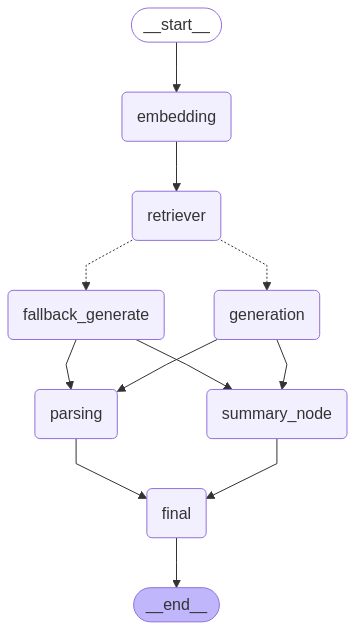

In [37]:
graph

In [8]:
for item in result["content"]:
    print("질문: ", item.question)
    print("답변: ", item.answer)
    print("\n")

질문:  SSE와는 무엇이 다른가요? HTTP push 기술인 WebSocket과는 어떤 차이점이 있나요?
답변:  SSE (Server-Sent Events)는 서버에서 단방향으로 클라이언트에 데이터를 전송하는 웹 기술입니다. WebSocket은 양방향으로 데이터를 전송할 수 있는 웹 기술입니다. 따라서, SSE는 서버가 새로운 데이터를 발생시키면 자동으로 클라이언트에게 전송하는 반면, WebSocket은 클라이언트와 서버 모두가 데이터를 송수신할 수 있습니다.


질문:  SseEmitter를 사용하여 알람 구독 서비스를 구현하는 데 어떤 장점이 있나요?
답변:  SseEmitter를 사용하여 알람 구독 서비스를 구현하면, 서버는 새로운 알람이 발생할 때만 클라이언트에 데이터를 전송하므로, 서버 자원을 절약하고 실시간성을 높일 수 있습니다. 또한, 사용자별로 SseEmitter를 관리함으로써, 특정 사용자에 대한 알람만 전송하도록 할 수 있어 더욱 효율적인 알람 구독 시스템을 구축할 수 있습니다.


질문:  ConcurrentHashMap에 대해 설명해주세요.
답변:  ConcurrentHashMap은 여러 스레드에서 동시에 접근해도 안전하게 데이터를 저장하고 검색할 수 있는 해시맵입니다. 이는 일반적인 HashMap과 달리, ConcurrentHashMap은 락을 사용하지 않고, 锁-free 또는 잠재적으로 로볼링 해싱을 사용하여 멀티 스레드 환경에서 성능을 높일 수 있습니다. 이 해시맵에서는 사용자 ID를 키로, SseEmitter 객체를 값으로 저장하여, 사용자별로 SseEmitter를 관리하고 업데이트할 수 있습니다.




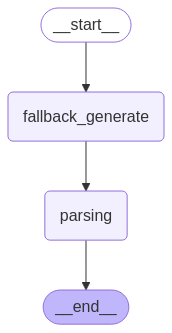

In [9]:
graph

In [ ]:
# from dotenv import load_dotenv
# from langsmith import traceable

# load_dotenv()

# @traceable(name="generate-question")
# def generate_question(input_text: str) -> str:
#     return f"이건 입력에 대한 질문입니다: {input_text}"

# generate_question("LangGraph 연동 테스트")

'이건 입력에 대한 질문입니다: LangGraph 연동 테스트'